In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [27]:
import matplotlib as mpl
mpl.style.use('seaborn')

In [28]:
import os
os.chdir(r'D:\Springboard\Capstone 3 maybe\Google Analytics')

In [29]:
train = pd.read_csv('train_eda.csv',index_col=0)


C:\Users\blain\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<AxesSubplot:>

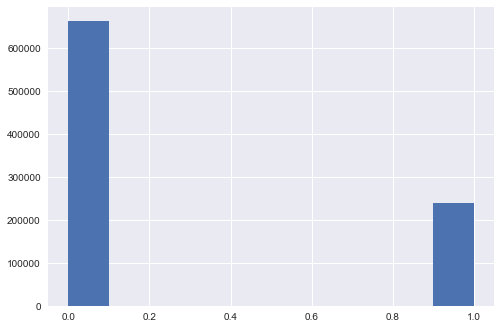

In [30]:
train.isMobile.hist()

In [31]:
mobile = train.groupby('isMobile')[['dollars']].agg(['sum','count'])
mobile.columns = [col[0]+col[1].capitalize() for col in mobile.columns]
mobile['frac'] = mobile.dollarsSum / mobile.dollarsSum.sum()
mobile

,dollarsSum,dollarsCount,frac
isMobile,,,
0,1403081.15,663196,0.959576
1,59106.88,238711,0.040424


In [32]:
mobile['frac'] = mobile.dollarsSum / mobile.dollarsSum.sum()
mobile

,dollarsSum,dollarsCount,frac
isMobile,,,
0,1403081.15,663196,0.959576
1,59106.88,238711,0.040424


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 901907 entries, 0 to 903652
Data columns (total 51 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   channelGrouping                          901907 non-null  object 
 1   date                                     901907 non-null  object 
 2   fullVisitorId                            901907 non-null  object 
 3   sessionId                                901907 non-null  object 
 4   visitId                                  901907 non-null  int64  
 5   visitNumber                              901907 non-null  int64  
 6   visitStartTime                           901907 non-null  int64  
 7   browser                                  901907 non-null  object 
 8   operatingSystem                          901907 non-null  object 
 9   isMobile                                 901907 non-null  int64  
 10  deviceCategory                  

In [34]:
train['isUS'] = train.country == 'United States'

In [35]:
train['isIntl'] = train['state']=='NotUS'

In [36]:
dummi = train.groupby('isUS')[['dollars']].agg(['sum','count'])
dummi.columns = [col[0]+col[1].capitalize() for col in dummi.columns]
dummi['frac'] = dummi.dollarsSum / dummi.dollarsSum.sum()
dummi

,dollarsSum,dollarsCount,frac
isUS,,,
False,86860.81,537441,0.059405
True,1375327.22,364466,0.940595


In [37]:
dummi = train.groupby('weekend')[['dollars']].agg(['sum','count'])
dummi.columns = [col[0]+col[1].capitalize() for col in dummi.columns]
dummi['frac'] = dummi.dollarsSum / dummi.dollarsSum.sum()
dummi

,dollarsSum,dollarsCount,frac
weekend,,,
0,1321184.67,705653,0.903567
1,141003.36,196254,0.096433


In [38]:
dummi = train.groupby('fullVisitorId')[['dollars']].agg(['sum','count'])
dummi.columns = [col[0]+col[1].capitalize() for col in dummi.columns]
dummi['vst1'] = dummi['dollarsCount'] == 1
dg = dummi.groupby('vst1')[['dollarsSum']].agg(['sum','count'])
dg.columns = [col[0]+col[1].capitalize() for col in dg.columns]
dg['frac'] = dg['dollarsSumSum'] / dg['dollarsSumSum'].sum()

In [39]:
dg

,dollarsSumSum,dollarsSumCount,frac
vst1,,,
False,1174443.41,90864,0.80321
True,287744.62,631804,0.19679


In [40]:
byuser = train.groupby('fullVisitorId')[['dollars']].agg(['sum','count'])
byuser.columns = [col[0]+col[1].capitalize() for col in byuser.columns]
byuser.shape

(722668, 2)

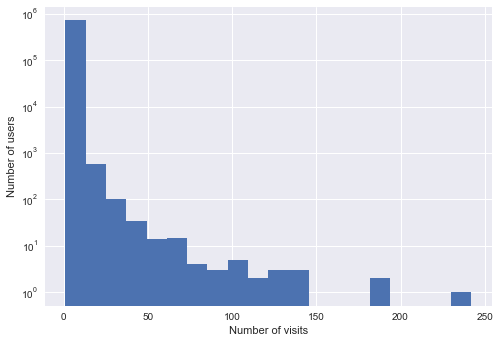

In [41]:
byuser.dollarsCount.hist(bins=20)
plt.yscale('log')
plt.ylabel('Number of users')
plt.xlabel('Number of visits')
plt.show()

In [42]:
byuser.dollarsCount.mean()

1.2480239888856293

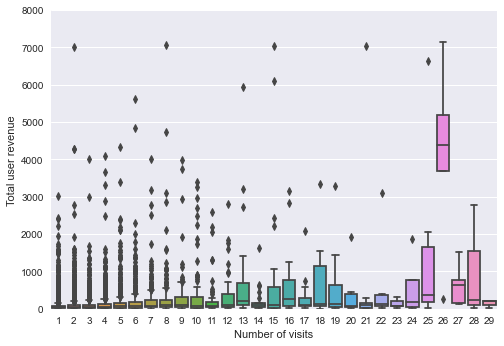

In [54]:
### limits
visits = 30
dollars = 0
sns.boxplot(data=byuser[(byuser['dollarsSum']>dollars) & (byuser['dollarsCount']<visits)], x='dollarsCount', y= 'dollarsSum')
#byuser.plot(kind='scatter',x='dollarsCount',y='dollarsSum')

plt.ylim((0,8000))
plt.ylabel('Total user revenue')
plt.xlabel('Number of visits')
plt.show()

In [79]:
byvisit_gb = byuser[byuser['dollarsSum']>0].groupby('dollarsCount')

byvisit = byvisit_gb[['dollarsSum']].mean()
byvisit['dollarsMedian'] = byvisit_gb[['dollarsSum']].median()
byvisit['p10'] = byvisit_gb[['dollarsSum']].quantile(.1)
byvisit['p90'] = byvisit_gb[['dollarsSum']].quantile(.9)
byvisit['p50'] = byvisit_gb[['dollarsSum']].quantile(.5)
byvisit['p75'] = byvisit_gb[['dollarsSum']].quantile(.75)



byvisit.head()

,dollarsSum,dollarsMedian,p10,p90,p50,p75
dollarsCount,,,,,,
1,81.908517,37.480,12.99,168.190,37.480,75.9600
2,102.097308,44.975,15.19,199.566,44.975,95.1200
3,114.133581,52.370,15.45,270.360,52.370,111.2650
4,146.319490,59.990,15.99,341.883,59.990,125.4625
5,181.806492,67.180,16.99,413.200,67.180,147.9400


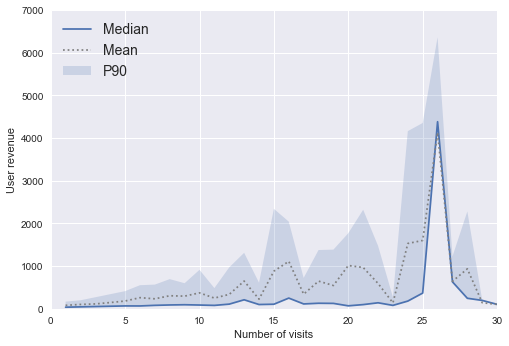

In [81]:
plt.plot(byvisit.index, byvisit['dollarsMedian'])
plt.plot(byvisit.index, byvisit['dollarsSum'], color='grey',linestyle=':')
plt.xlim(0,30)
plt.fill_between(byvisit.index,byvisit['p90'],byvisit['dollarsMedian'],alpha=.2)
plt.legend(labels=['Median','Mean','P90'],loc='upper left',fontsize=14)

plt.ylim(0,7000)
plt.ylabel('User revenue')
plt.xlabel('Number of visits')
plt.show()